In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
dft = pd.read_csv('encoded_file.csv')
# dft = dft.drop('Yield(kg/ha)', axis = 1)
# dft = dft[['Area(ha)', 'Production(mt)']]
dft

Year  Latitude  Longitude  Precipitation(mm)  Surface_Pressure(kPa)  \
0      1982     29.11       81.3           1.822329              87.577863   
1      1982     29.11       81.3           1.822329              87.577863   
2      1982     29.11       81.3           1.822329              87.577863   
3      1982     29.11       81.3           1.822329              87.577863   
4      1982     29.11       81.3           1.822329              87.577863   
...     ...       ...        ...                ...                    ...   
11620  2013     26.90       86.5           2.990219              94.958986   
11621  2013     26.90       86.5           2.990219              94.958986   
11622  2013     26.90       86.5           2.990219              94.958986   
11623  2013     26.90       86.5           2.990219              94.958986   
11624  2013     26.90       86.5           2.990219              94.958986   

       Specific_Humidity(g/kg)  Relative_Humidity(%)    Temp(C)  \
0                     7.857616             47.294082  19.098575   
1                     7.857616             47.294082  19.098575   
2                     7.857616             47.294082  19.098575   
3                     7.857616             47.294082  19.098575   
4                     7.857616             47.294082  19.098575   
...                        ...                   ...        ...   
11620                11.648603             59.332767  23.291014   
11621                11.648603             59.332767  23.291014   
11622                11.648603             59.332767  23.291014   
11623                11.648603             59.332767  23.291014   
11624                11.648603             59.332767  23.291014   

       Wet_Bulb_Temp(C)  Max_Temp(C)  ...  Wind_Speed_10M_Range(m/s)  \
0             12.374877        38.94  ...                       8.59   
1             12.374877        38.94  ...                       8.59   
2             12.374877        38.94  ...                       8.59   
3             12.374877        38.94  ...                       8.59   
4             12.374877        38.94  ...                       8.59   
...                 ...          ...  ...                        ...   
11620         13.583370        40.14  ...                      10.86   
11621         13.583370        40.14  ...                      10.86   
11622         13.583370        40.14  ...                      10.86   
11623         13.583370        40.14  ...                      10.86   
11624         13.583370        40.14  ...                      10.86   

       Wind_Speed_50M_Range(m/s)  Area(ha)  Crop_Barley  Crop_Maize  \
0                          10.48     500.0            1           0   
1                          10.48    2850.0            0           1   
2                          10.48     850.0            0           0   
3                          10.48    1930.0            0           0   
4                          10.48    3200.0            0           0   
...                          ...       ...          ...         ...   
11620                      13.09      35.0            1           0   
11621                      13.09    9500.0            0           1   
11622                      13.09    2580.0            0           0   
11623                      13.09   15250.0            0           0   
11624                      13.09    5120.0            0           0   

       Crop_Millet  Crop_Paddy  Crop_Wheat  Yield(kg/ha)  Production(mt)  
0                0           0           0         800.0           400.0  
1                0           0           0        1200.0          3420.0  
2                1           0           0        1106.0           940.0  
3                0           1           0        1399.0          2700.0  
4                0           0           1        1050.0          3360.0  
...            ...         ...         ...           ...             ...  
11620            0    

In [26]:
#Removing of outliers
from scipy import stats

y = dft['Production(mt)']
X = dft.drop('Production(mt)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Production(mt)', y)
dft = X
dft

Area(ha)  Production(mt)
0         500.0           400.0
1        2850.0          3420.0
2         850.0           940.0
3        1930.0          2700.0
4        3200.0          3360.0
...         ...             ...
11620      35.0            35.0
11621    9500.0         23500.0
11622    2580.0          5000.0
11623   15250.0         52850.0
11624    5120.0         15826.0

[11625 rows x 2 columns]

In [27]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

y = dft['Production(mt)']
X = dft.drop('Production(mt)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Production(mt)', y)

dft = data_without_yield
dft

Area(ha)  Production(mt)
0      0.004254           400.0
1      0.024245          3420.0
2      0.007231           940.0
3      0.016419          2700.0
4      0.027222          3360.0
...         ...             ...
11620  0.000298            35.0
11621  0.080817         23500.0
11622  0.021948          5000.0
11623  0.129732         52850.0
11624  0.043556         15826.0

[11625 rows x 2 columns]

## first

In [5]:
y = dft['Production(mt)']
X = dft.drop('Production(mt)', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):
    # linear least-squares
    slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')
    ax.scatter(y_test, y_pred, alpha=0.7)
    # Anzeigen der Werte in einer Box
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    ax.set_xlabel('Actual values in tonnes')
    ax.set_ylabel('Predictes values in tonnes')
    ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

In [9]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from sklearn.model_selection import cross_validate, cross_val_predict
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeRegressor

# import time
# from scipy.stats import linregress

# lin = LinearRegression()
# dtr = DecisionTreeRegressor()
# sgd = SGDRegressor(loss='squared_error')
# gbr = GradientBoostingRegressor()
# knn = KNeighborsRegressor(n_neighbors=5)
# rfr = RandomForestRegressor()

# # Verwendete Regressionen
# estimators = [('Linear Regression', lin),
#               ('Decision Tree Regression', dtr),
#               ('Stochastic Gradient Descent Regression', sgd),
#               ('Gradient Boosting Regression', gbr),
#               ('K-nearest Neighbour 5', knn),
#               ('Random Forest Regression', rfr)]

# # Festlegen des Subplots
# fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
# axs = np.ravel(axs)

# for ax, (name, est) in zip(axs, estimators):
#     start_time = time.time()
#     # Trainieren des Modelles
#     est.fit(X_train, y_train)
#     y_pred = est.predict(X_test)
#     estimated_time = time.time() - start_time
    
#     # Anzeigen des Modelles
#     plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
#                           (r' = {:.2f}' + '\n' + 
#                           r'MAE = {:.0f}' + '\n' +
#                           r'MSE = {:.0f}' + '\n' +
#                           r'RMSE = {:.0f}' + '\n' +
#                           r'MAX = {:.0f}' + '\n' +
#                           r'MAPE = {:.2f}%')
#                           .format(r2_score(y_test, y_pred),
#                                   mean_absolute_error(y_test, y_pred),
#                                   mean_squared_error(y_test, y_pred),
#                                   mean_squared_error(y_test, y_pred, squared=False),
#                                   max_error(y_test, y_pred),
#                                   mean_absolute_percentage_error(y_test, y_pred)))
# plt.suptitle('Regressionsverfahren')
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)
# plt.show()

/tmp/ipykernel_18880/4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/tmp/ipykernel_18880/4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/tmp/ipykernel_18880/4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/tmp/ipykernel_18880/4111968303.py:3: RuntimeWarning: invalid value encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/tmp/ipykernel_18880/4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipykerne

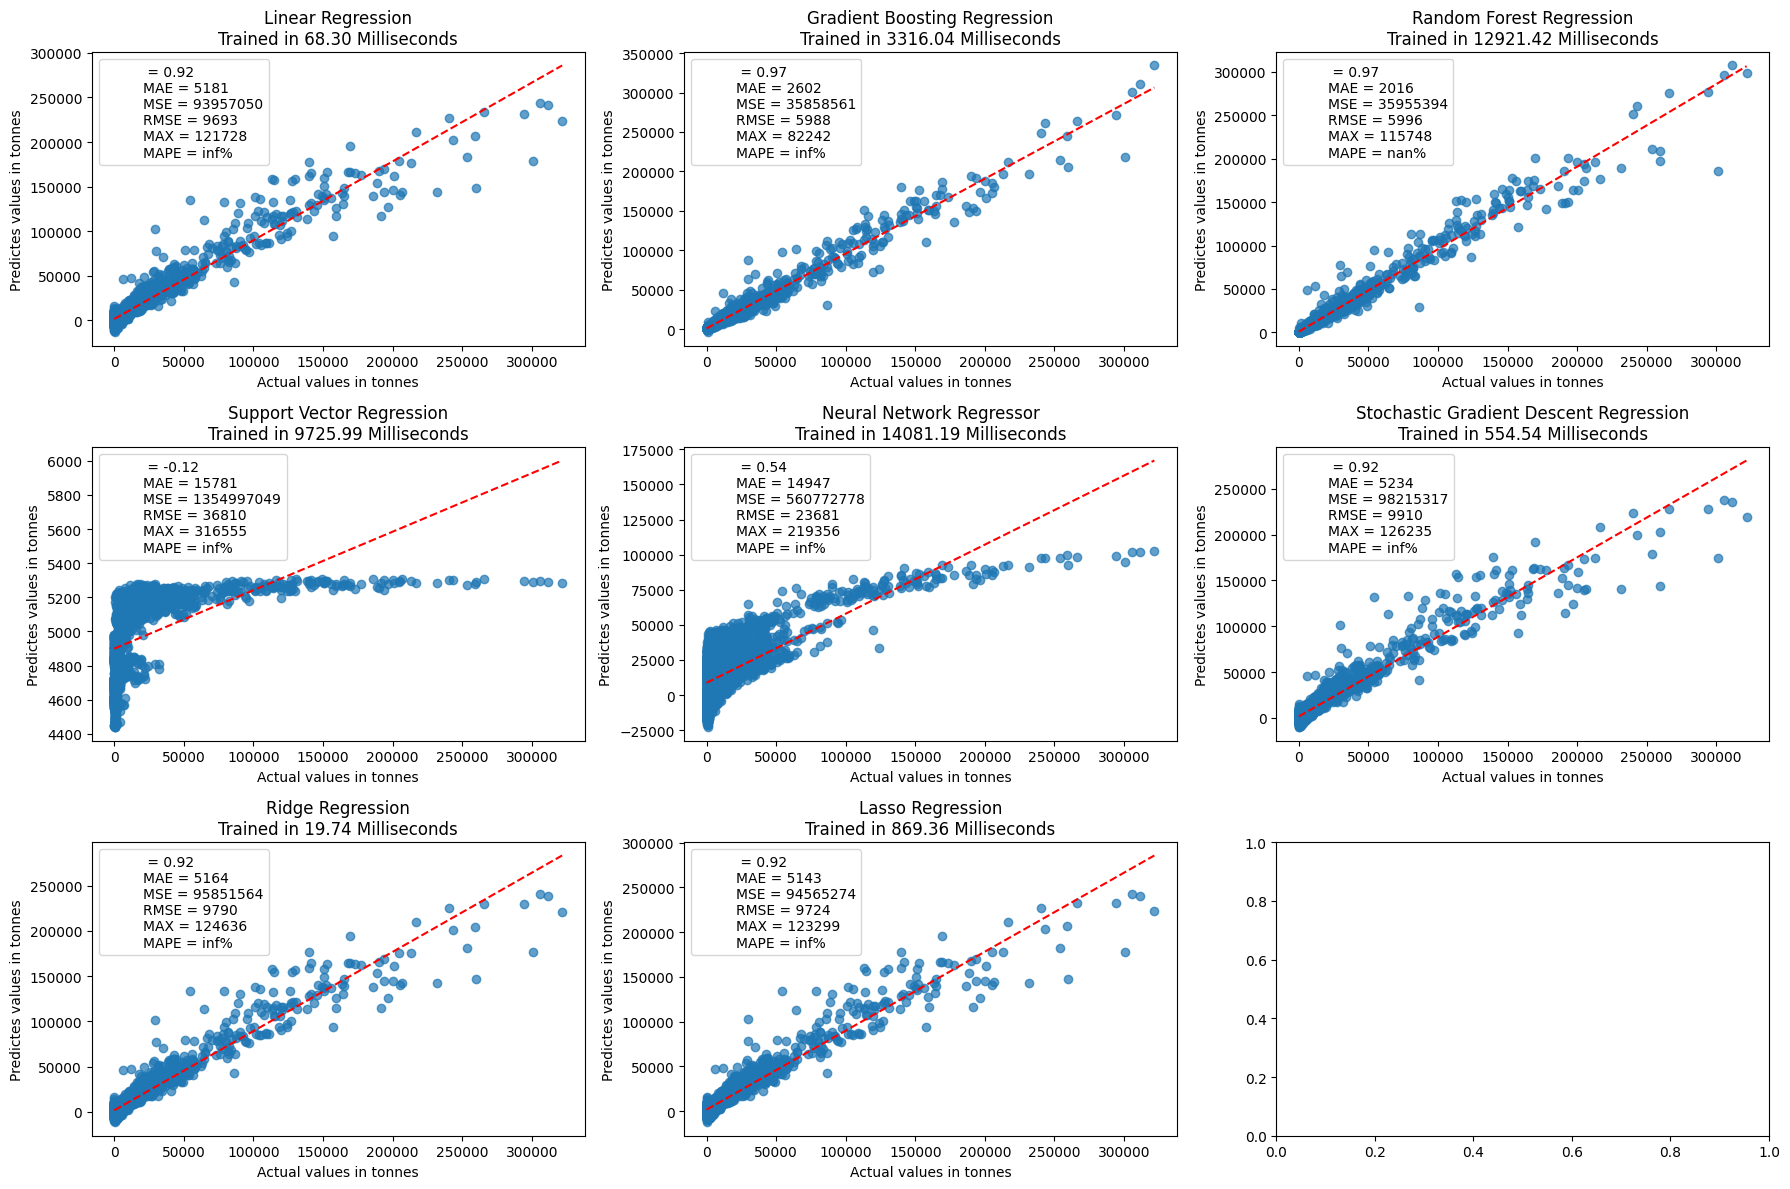

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np

import time
from scipy.stats import linregress

# Create instances of the regression models
lin = LinearRegression()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
svr = SVR()
nnr = MLPRegressor(max_iter=500)
sgd = SGDRegressor(loss='squared_error')
ridge = Ridge()
lasso = Lasso()

# Define the list of estimators with their names
estimators = [
    ('Linear Regression', lin),
    ('Gradient Boosting Regression', gbr),
    ('Random Forest Regression', rfr),
    ('Support Vector Regression', svr),
    ('Neural Network Regressor', nnr),
    ('Stochastic Gradient Descent Regression', sgd),
    ('Ridge Regression', ridge),
    ('Lasso Regression', lasso)
]

# Define the subplots grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = np.ravel(axs)

# Loop over the estimators and plot the results
for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    # Trainieren des Modelles
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    estimated_time = time.time() - start_time
    
    # Anzeigen des Modelles
    plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r' = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
    
plt.tight_layout()
plt.show()

## second

In [28]:
# features = dft[['Precipitation(mm)', 'Temp(C)']]
# target = dft['Yield(kg/ha)']
target = dft['Production(mt)']
features = dft.drop('Production(mt)', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = rf_regressor.predict(X_test)

In [32]:
y_pred

array([ 1084.4402225 , 31466.96335006,  2033.62433333, ...,
         320.38662024, 21242.9201233 ,   295.87424581])

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 129697508.56459394


In [34]:
# new_data = pd.DataFrame({'Precipitation(mm)': [0.5, 0.3], 'Temp(C)': [25, 28]})  # Replace with your new data
# predicted_yield = rf_regressor.predict(new_data)
# print("Predicted Yield:", predicted_yield)

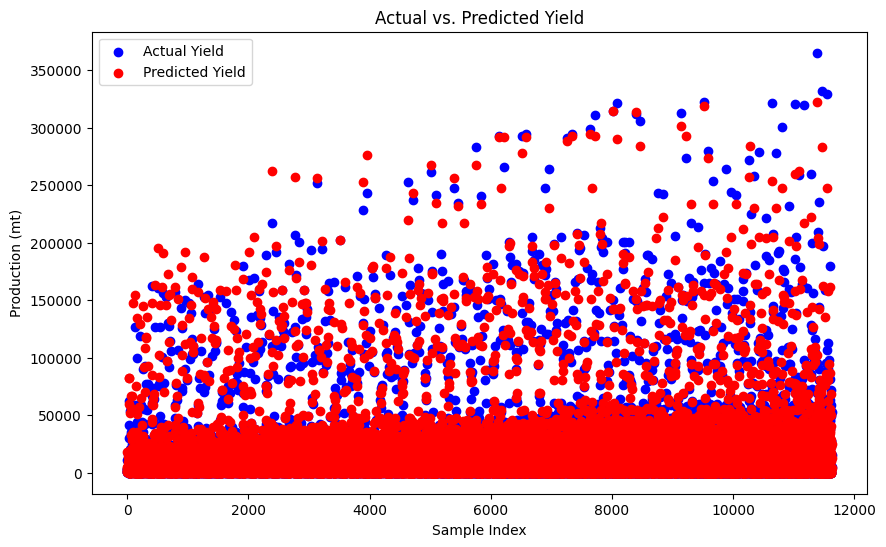

In [35]:
# Predict the yield for the entire dataset
predicted_yield = rf_regressor.predict(features)

# Create a plot to compare actual and predicted yield values
plt.figure(figsize=(10, 6))
plt.scatter(dft.index, target, color='blue', label='Actual Yield')
plt.scatter(dft.index, predicted_yield, color='red', label='Predicted Yield')
plt.xlabel('Sample Index')
plt.ylabel('Production (mt)')
plt.title('Actual vs. Predicted Yield')
plt.legend()
plt.show()

In [36]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8848582917458321


In [4]:
dft

Year  Latitude  Longitude  Precipitation(mm)  Surface_Pressure(kPa)  \
0      1982     29.11       81.3           1.822329              87.577863   
1      1982     29.11       81.3           1.822329              87.577863   
2      1982     29.11       81.3           1.822329              87.577863   
3      1982     29.11       81.3           1.822329              87.577863   
4      1982     29.11       81.3           1.822329              87.577863   
...     ...       ...        ...                ...                    ...   
11620  2013     26.90       86.5           2.990219              94.958986   
11621  2013     26.90       86.5           2.990219              94.958986   
11622  2013     26.90       86.5           2.990219              94.958986   
11623  2013     26.90       86.5           2.990219              94.958986   
11624  2013     26.90       86.5           2.990219              94.958986   

       Specific_Humidity(g/kg)  Relative_Humidity(%)    Temp(C)  \
0                     7.857616             47.294082  19.098575   
1                     7.857616             47.294082  19.098575   
2                     7.857616             47.294082  19.098575   
3                     7.857616             47.294082  19.098575   
4                     7.857616             47.294082  19.098575   
...                        ...                   ...        ...   
11620                11.648603             59.332767  23.291014   
11621                11.648603             59.332767  23.291014   
11622                11.648603             59.332767  23.291014   
11623                11.648603             59.332767  23.291014   
11624                11.648603             59.332767  23.291014   

       Wet_Bulb_Temp(C)  Max_Temp(C)  ...  Wind_Speed_10M_Range(m/s)  \
0             12.374877        38.94  ...                       8.59   
1             12.374877        38.94  ...                       8.59   
2             12.374877        38.94  ...                       8.59   
3             12.374877        38.94  ...                       8.59   
4             12.374877        38.94  ...                       8.59   
...                 ...          ...  ...                        ...   
11620         13.583370        40.14  ...                      10.86   
11621         13.583370        40.14  ...                      10.86   
11622         13.583370        40.14  ...                      10.86   
11623         13.583370        40.14  ...                      10.86   
11624         13.583370        40.14  ...                      10.86   

       Wind_Speed_50M_Range(m/s)  Area(ha)  Crop_Barley  Crop_Maize  \
0                          10.48     500.0            1           0   
1                          10.48    2850.0            0           1   
2                          10.48     850.0            0           0   
3                          10.48    1930.0            0           0   
4                          10.48    3200.0            0           0   
...                          ...       ...          ...         ...   
11620                      13.09      35.0            1           0   
11621                      13.09    9500.0            0           1   
11622                      13.09    2580.0            0           0   
11623                      13.09   15250.0            0           0   
11624                      13.09    5120.0            0           0   

       Crop_Millet  Crop_Paddy  Crop_Wheat  Yield(kg/ha)  Production(mt)  
0                0           0           0         800.0           400.0  
1                0           0           0        1200.0          3420.0  
2                1           0           0        1106.0           940.0  
3                0           1           0        1399.0          2700.0  
4                0           0           1        1050.0          3360.0  
...            ...         ...         ...           ...             ...  
11620            0    

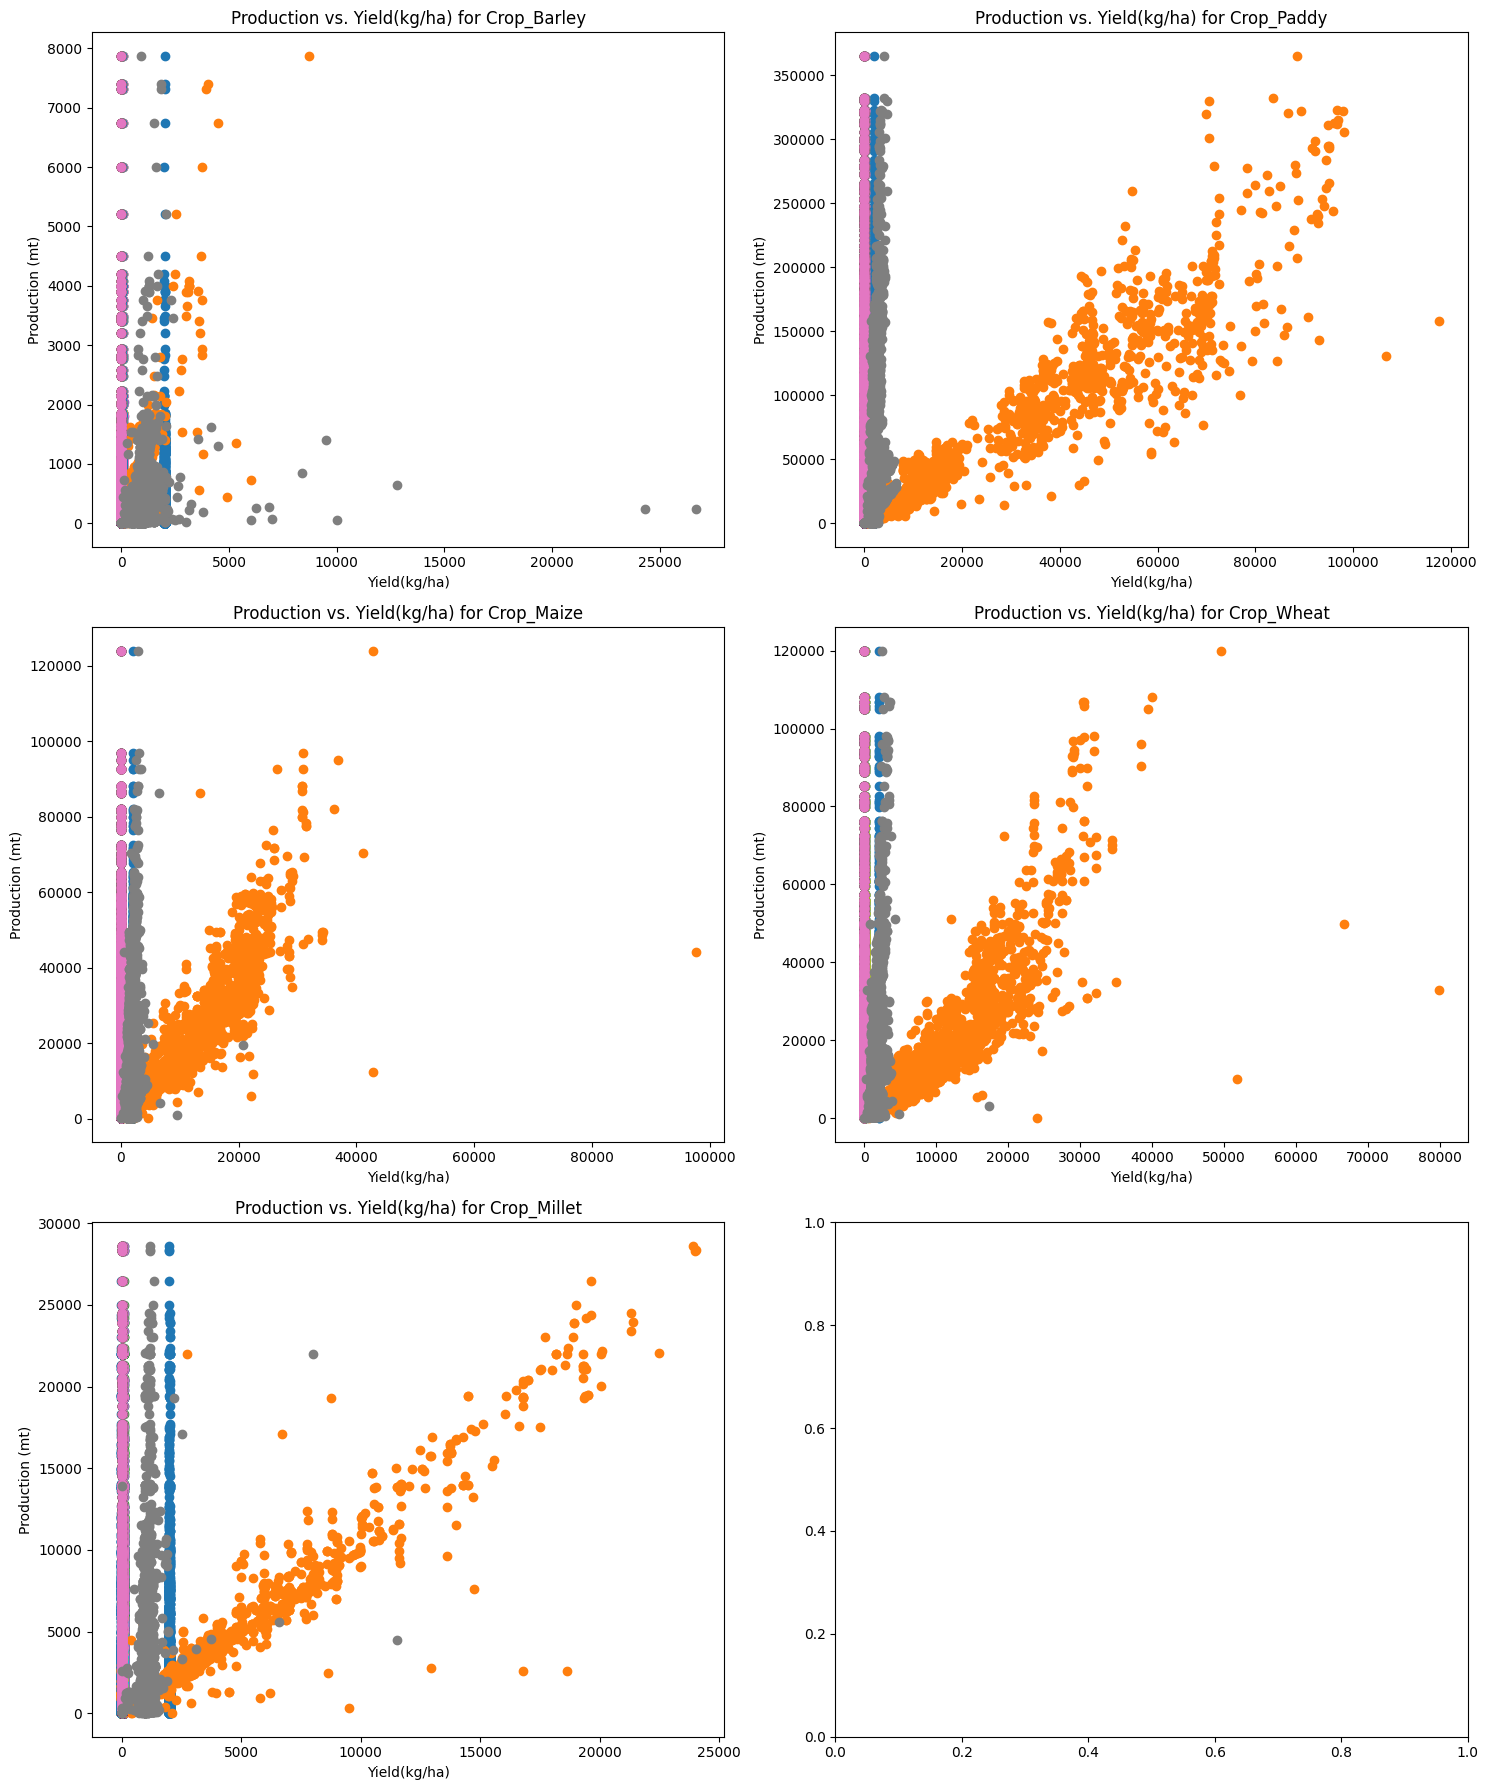

In [24]:
crop_types = ['Crop_Barley', 'Crop_Maize', 'Crop_Millet', 'Crop_Paddy', 'Crop_Wheat']

# Create a figure with a 3x2 grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

for i, crop in enumerate(crop_types):
    row = i % 3   # Calculate the row index
    col = i // 3  # Calculate the column index

    crop_data = dft[dft[crop] == 1]

    for j, column in enumerate(dft.columns):
        if column != 'Production(mt)':
            # Plot the scatter plot in the appropriate subplot
            axes[row, col].scatter(crop_data[column], crop_data['Production(mt)'])
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel('Production (mt)')
            axes[row, col].set_title(f'Production vs. {column} for {crop}')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

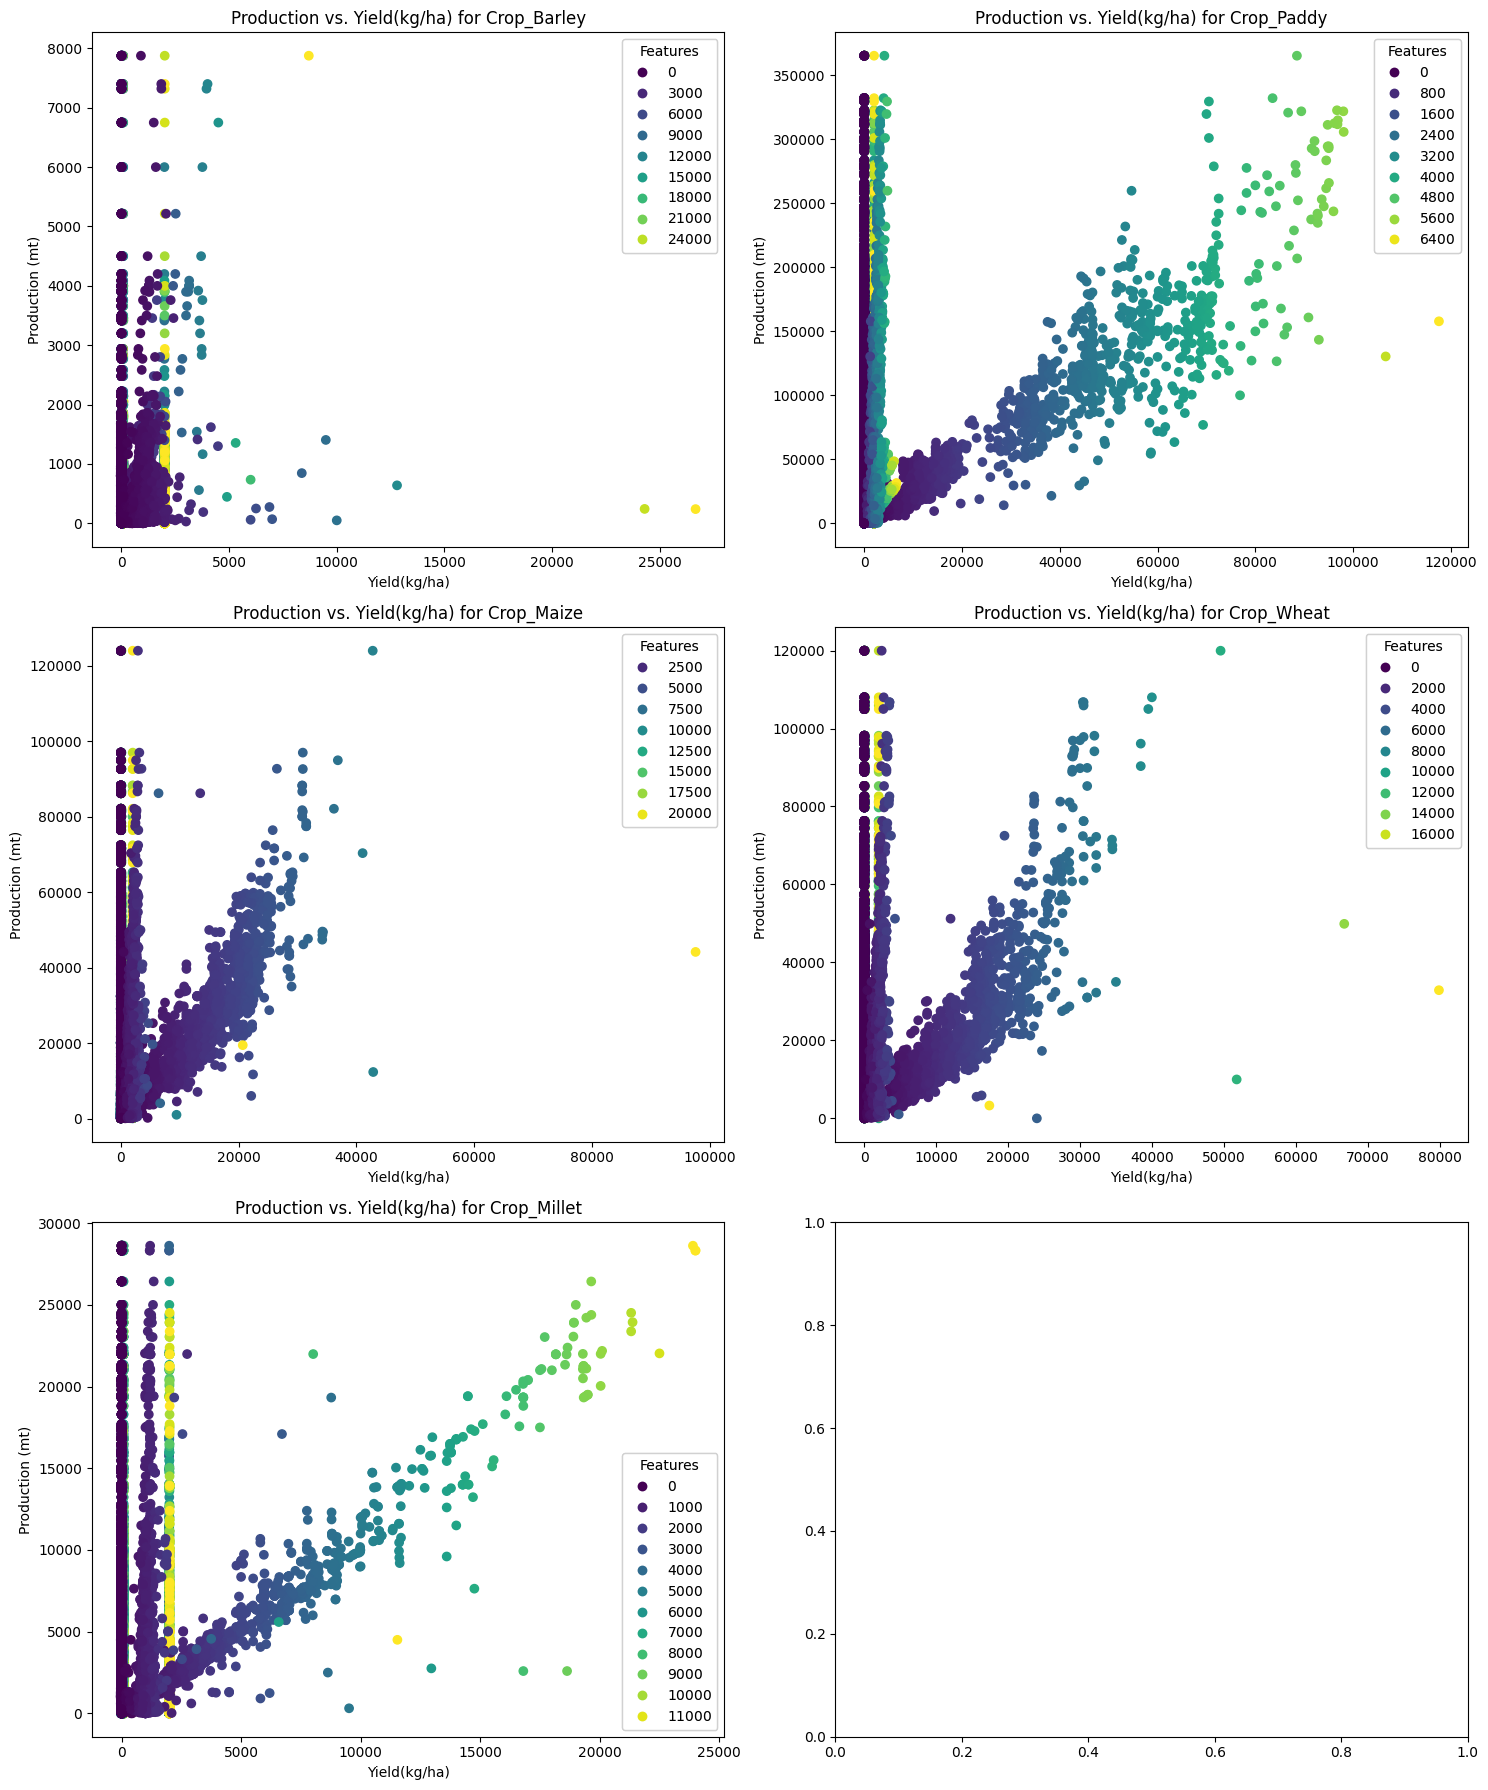

In [26]:
crop_types = ['Crop_Barley', 'Crop_Maize', 'Crop_Millet', 'Crop_Paddy', 'Crop_Wheat']

# Create a figure with a 3x2 grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

for i, crop in enumerate(crop_types):
    row = i % 3   # Calculate the row index
    col = i // 3  # Calculate the column index

    crop_data = dft[dft[crop] == 1]

    # Iterate over the columns of dft
    for j, column in enumerate(dft.columns):
        if column != 'Production(mt)':
            # Scatter plot with different colors for each feature
            scatter = axes[row, col].scatter(crop_data[column], crop_data['Production(mt)'],
                                             c=crop_data[column], cmap='viridis')
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel('Production (mt)')
            axes[row, col].set_title(f'Production vs. {column} for {crop}')

    # Create a legend for the scatter plot
    legend = axes[row, col].legend(*scatter.legend_elements(), title='Features')
    axes[row, col].add_artist(legend)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

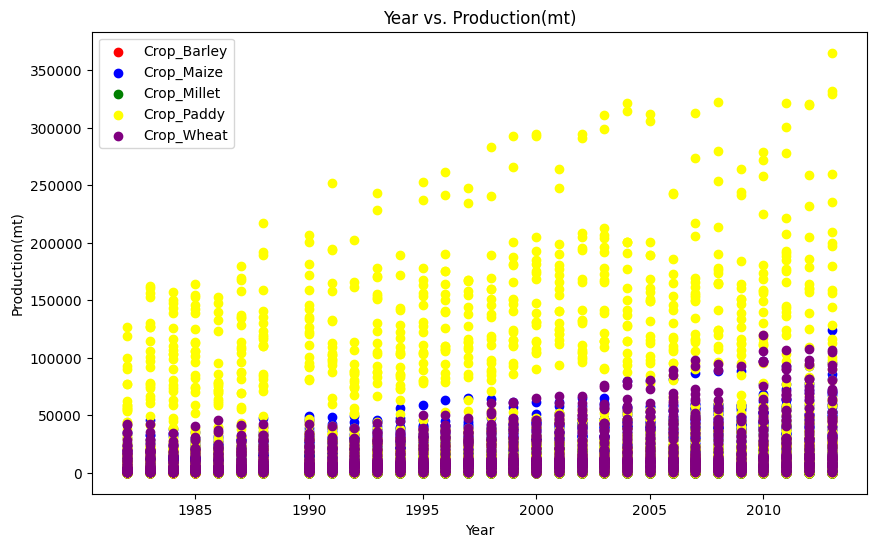

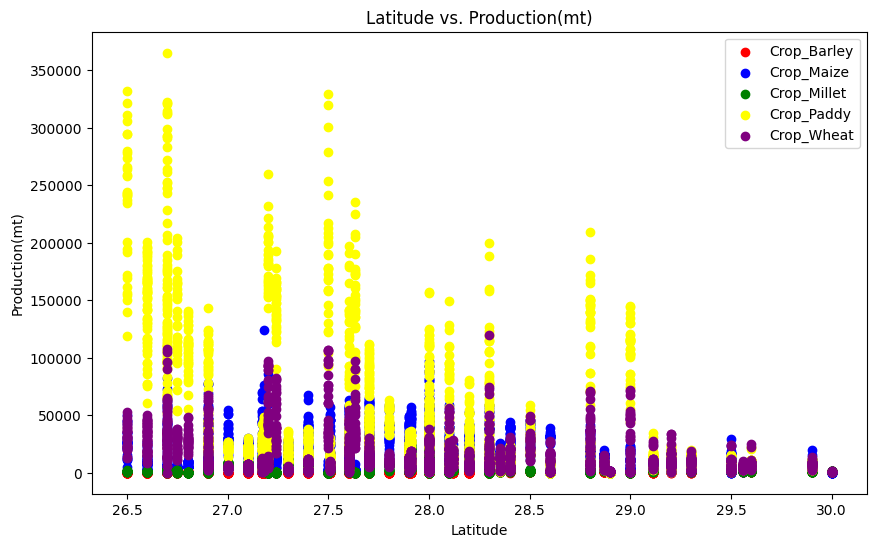

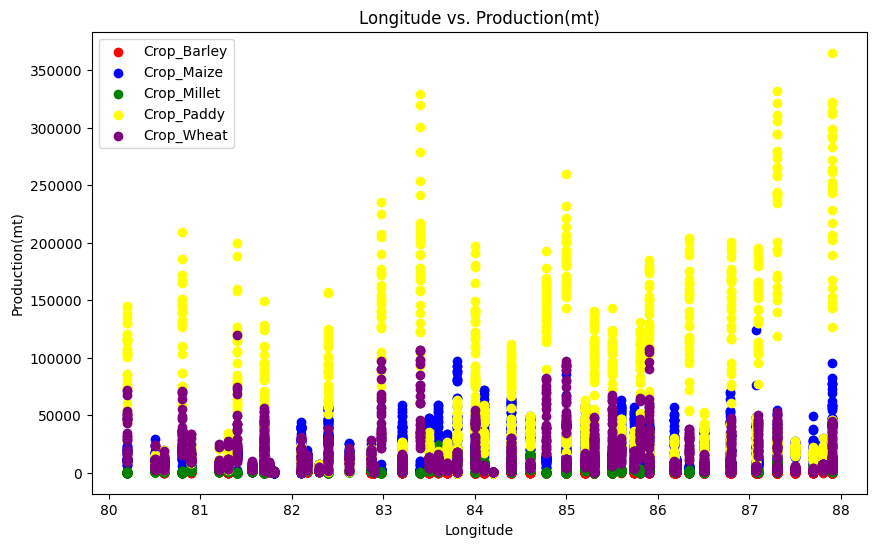

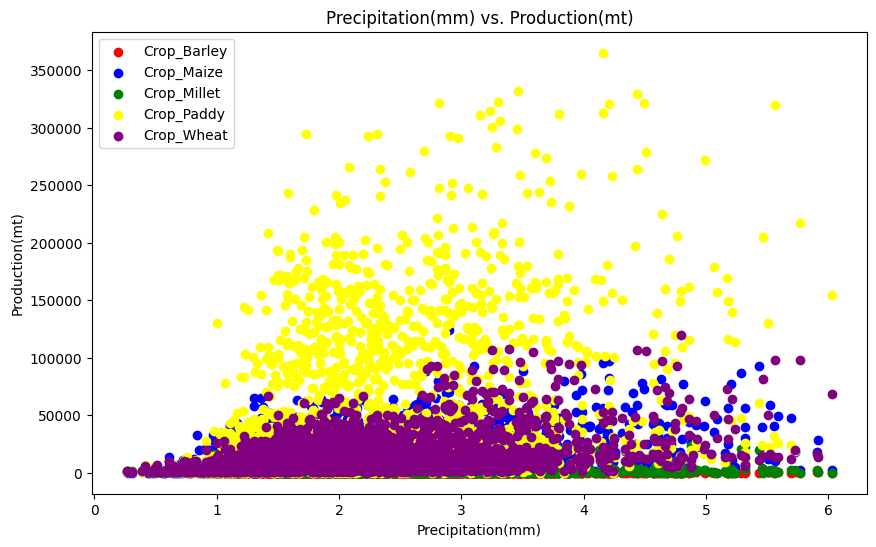

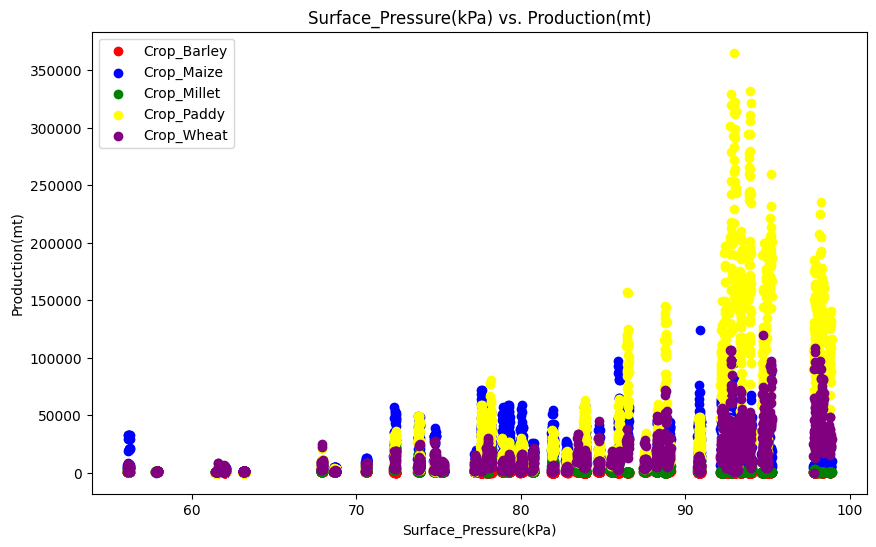

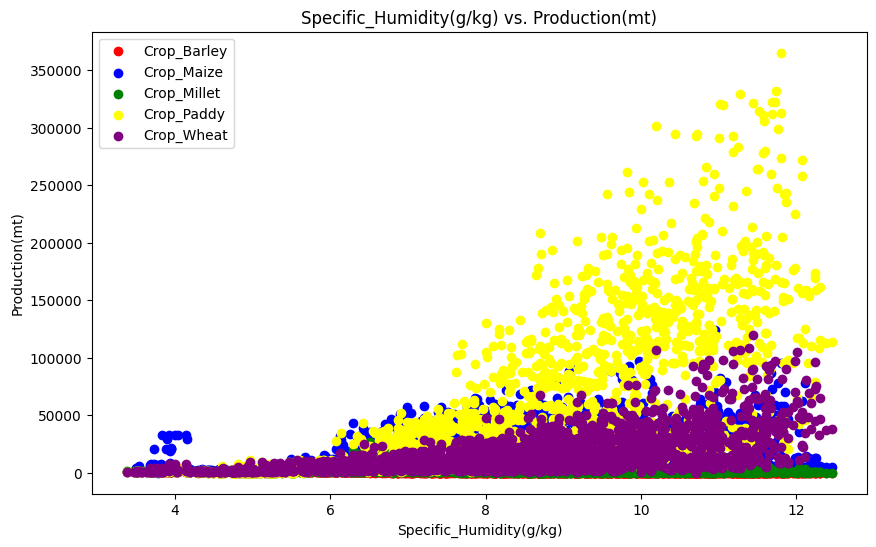

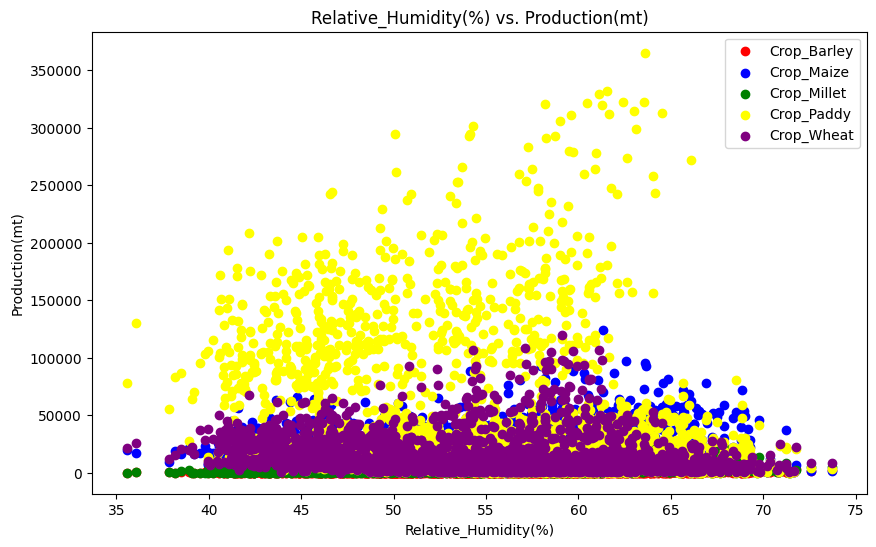

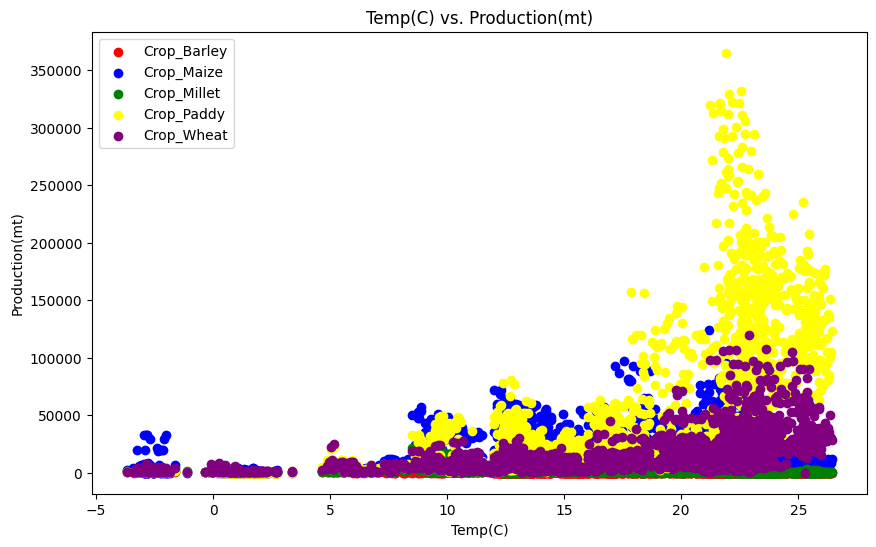

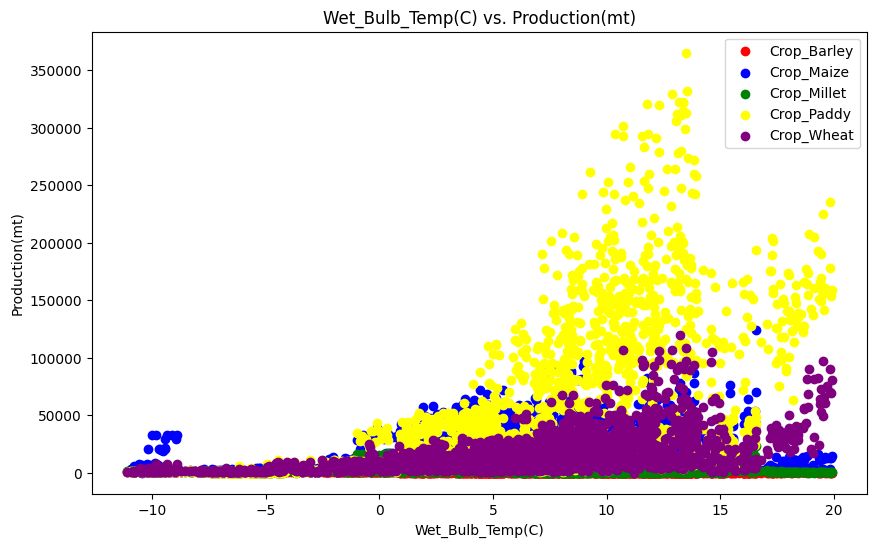

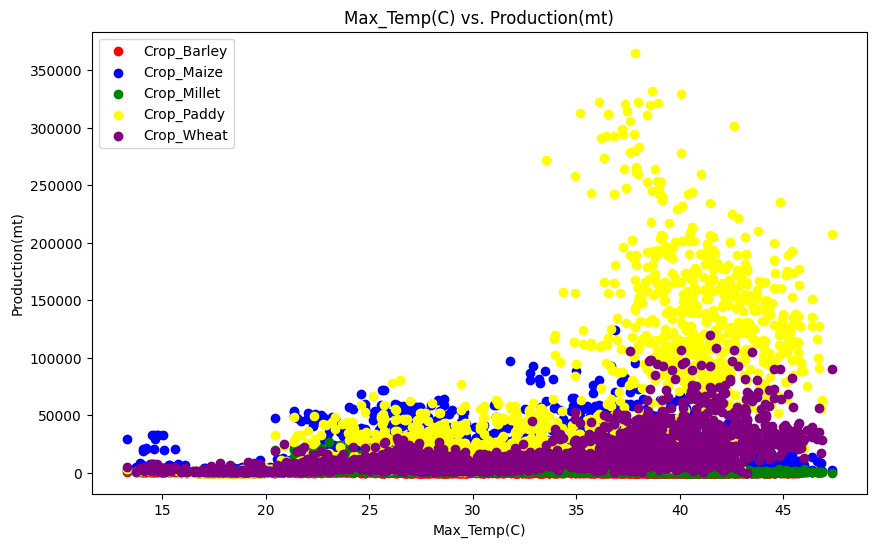

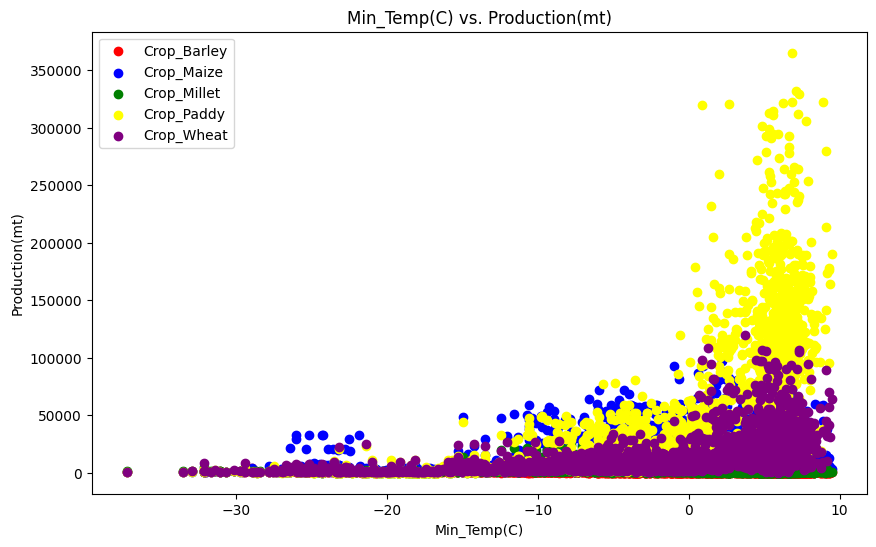

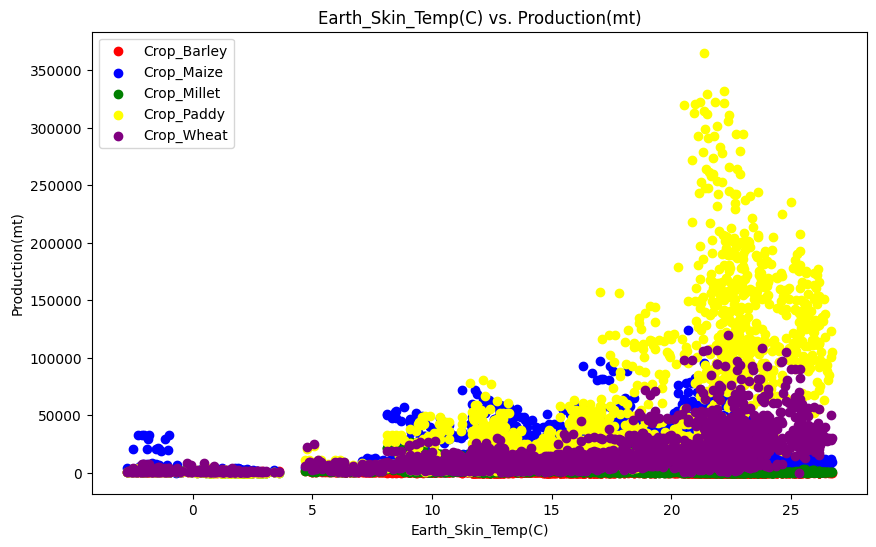

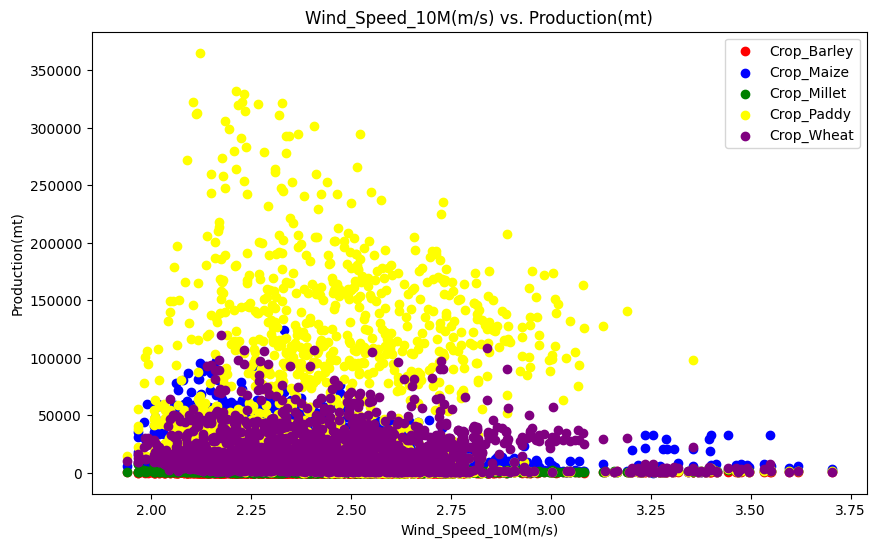

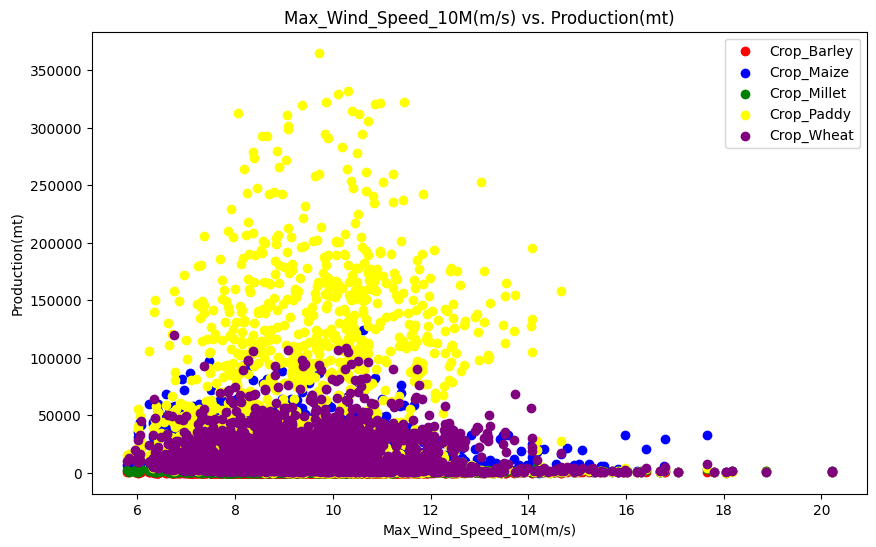

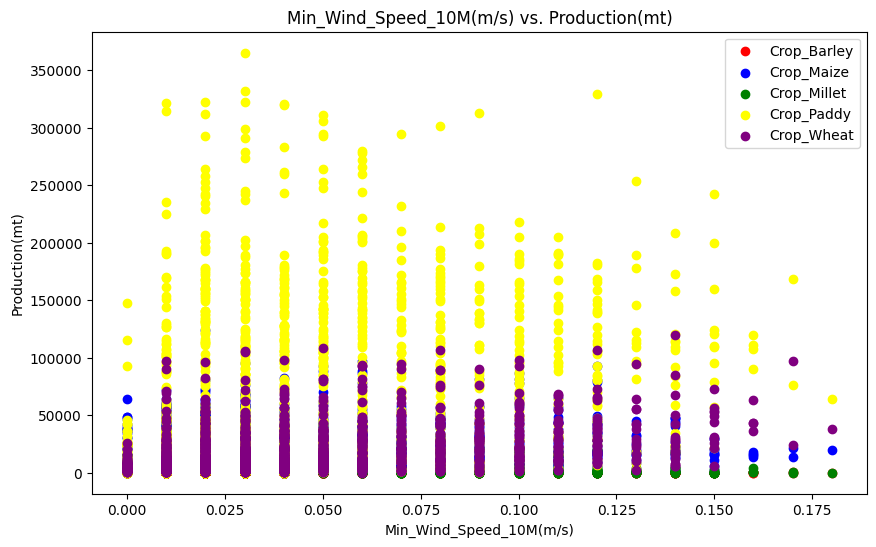

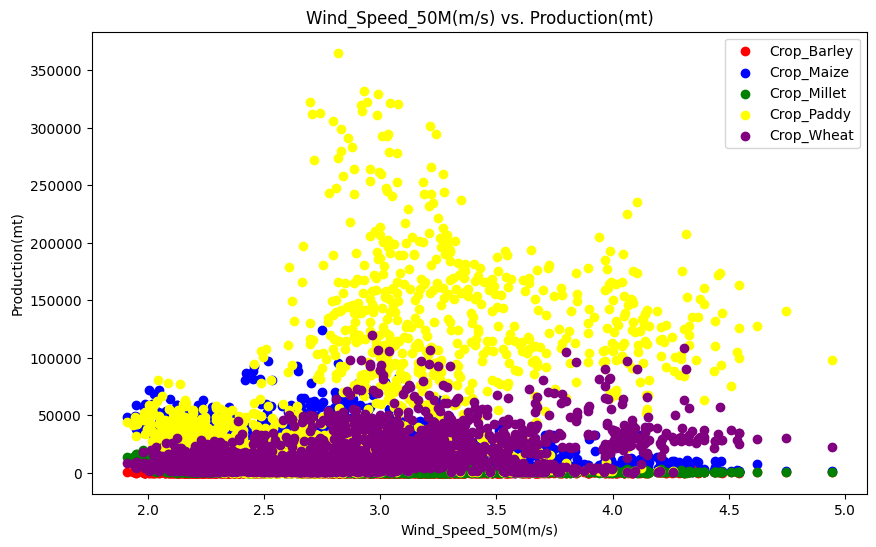

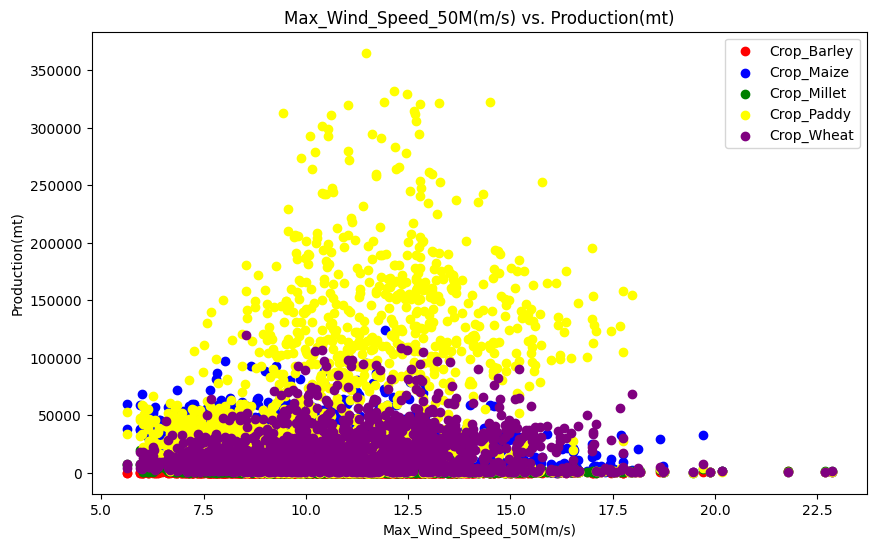

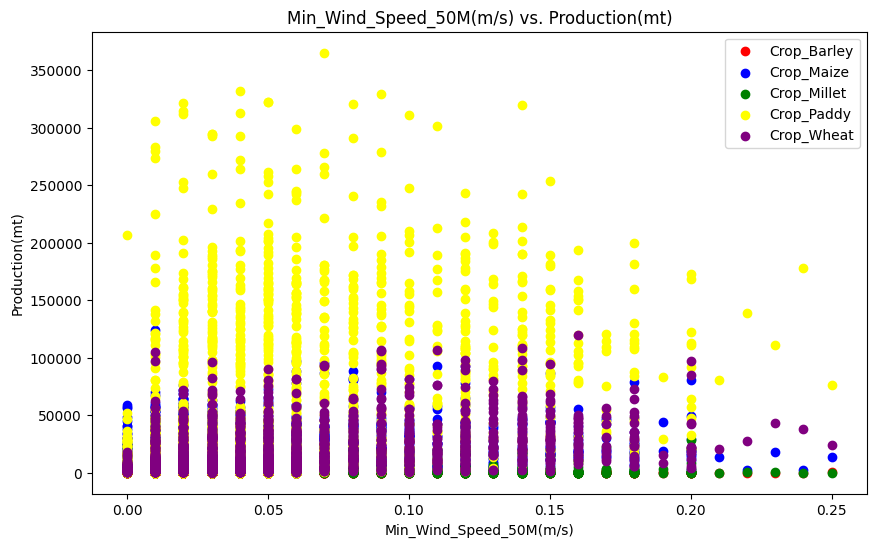

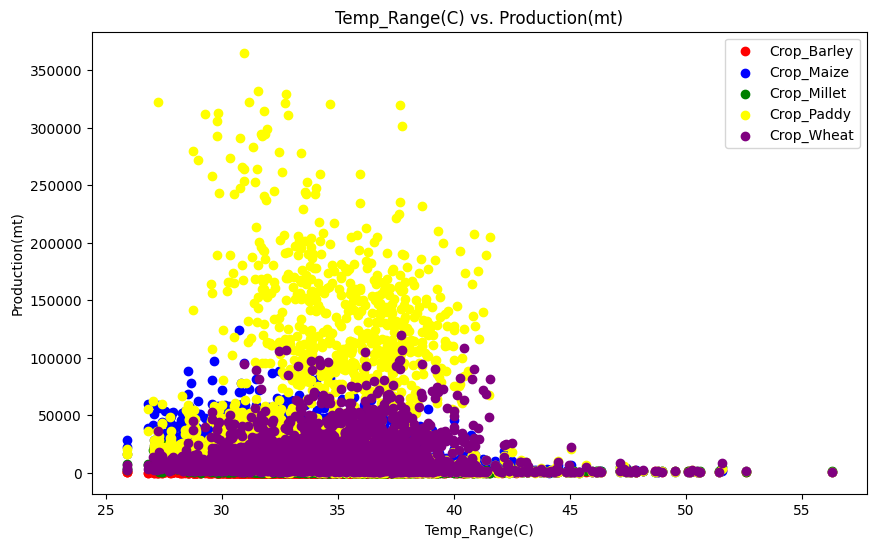

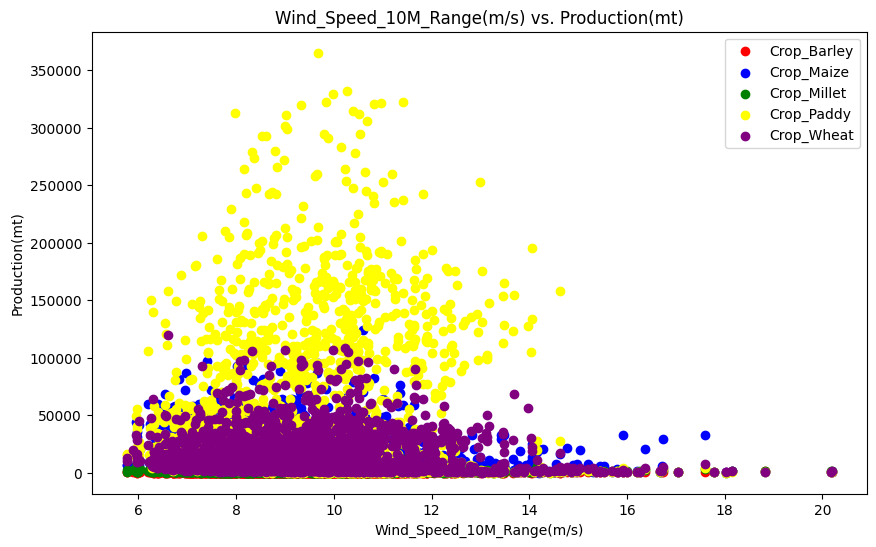

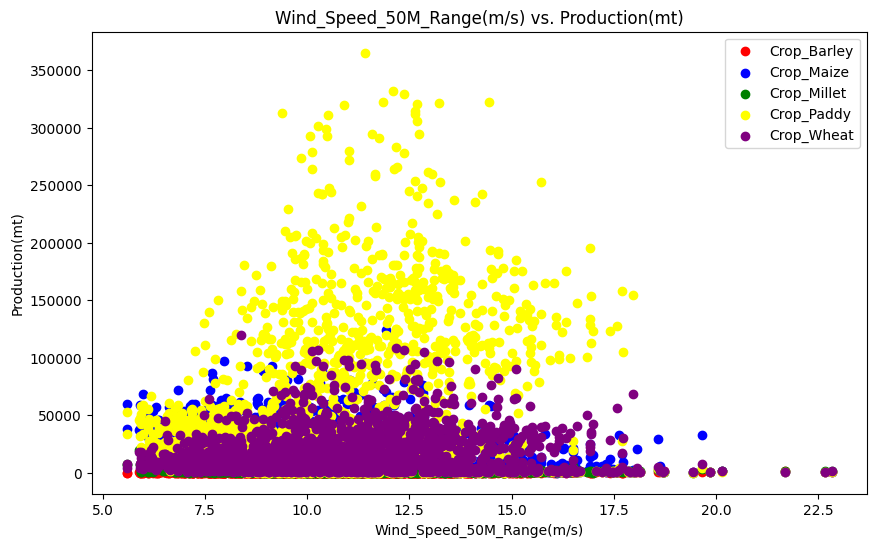

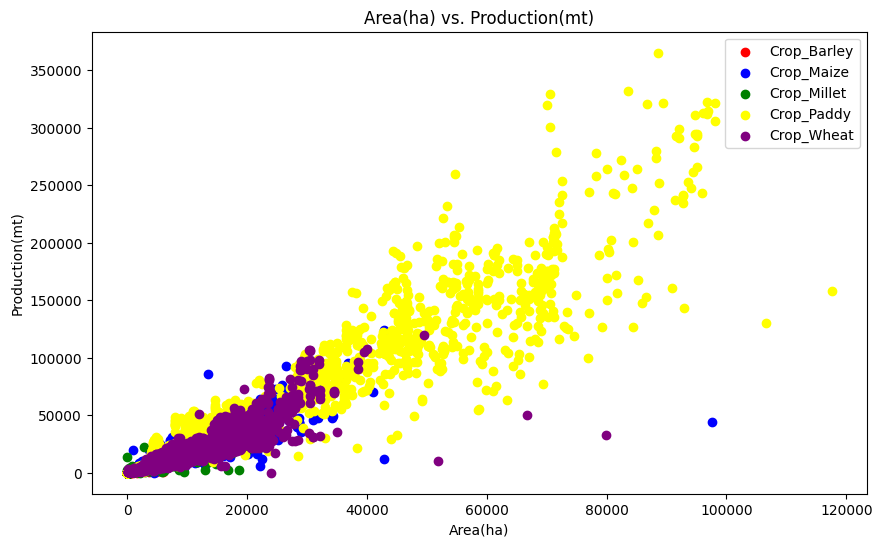

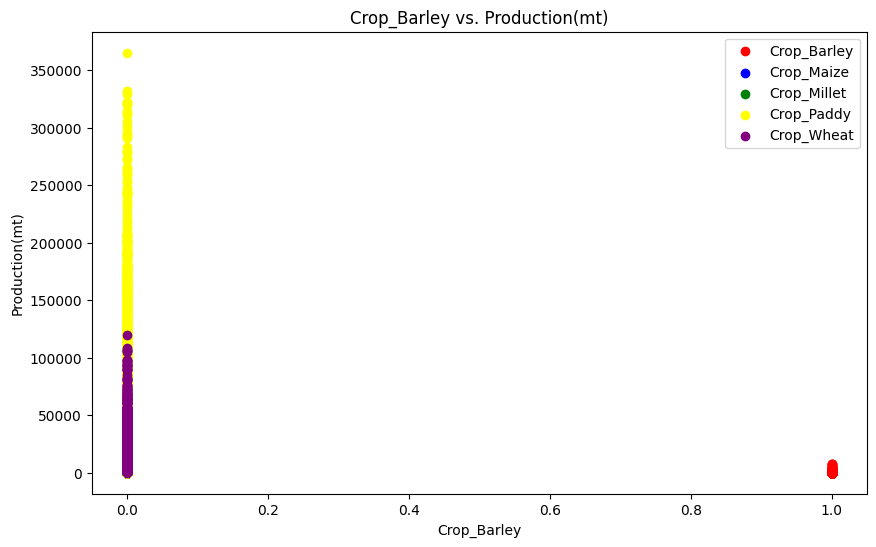

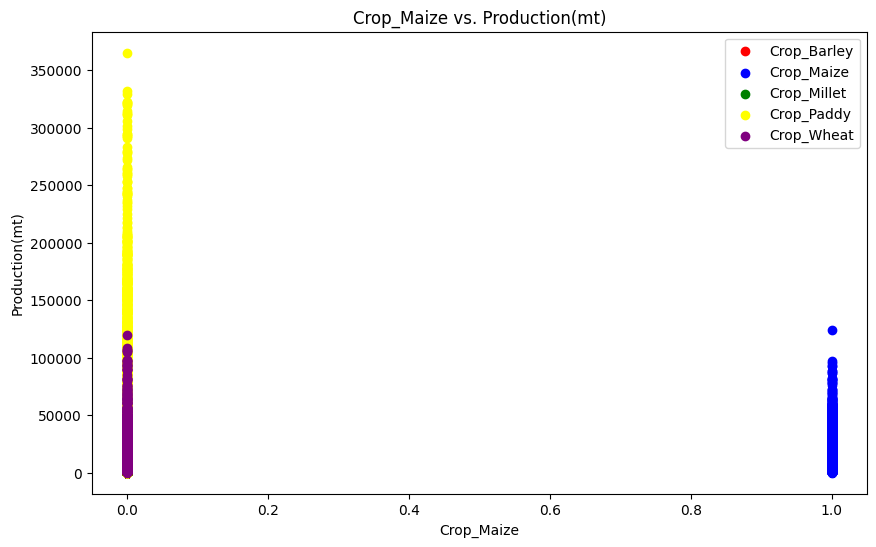

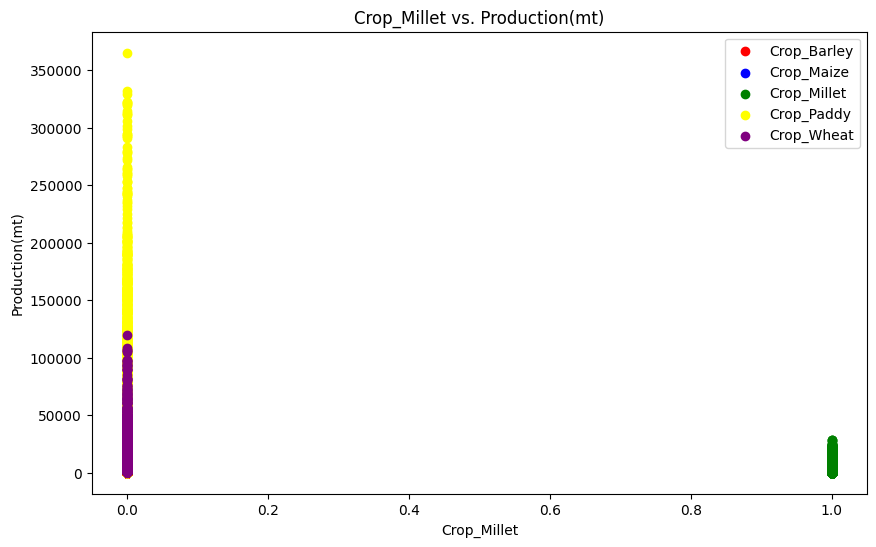

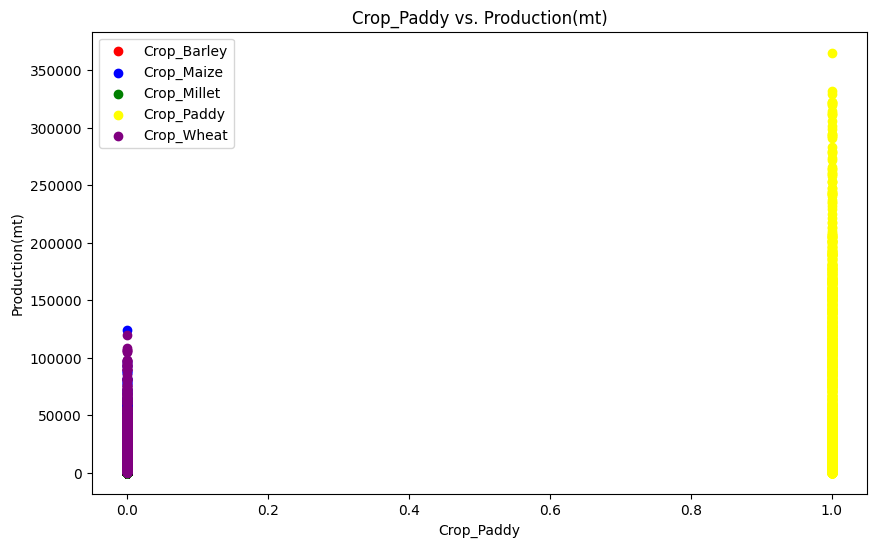

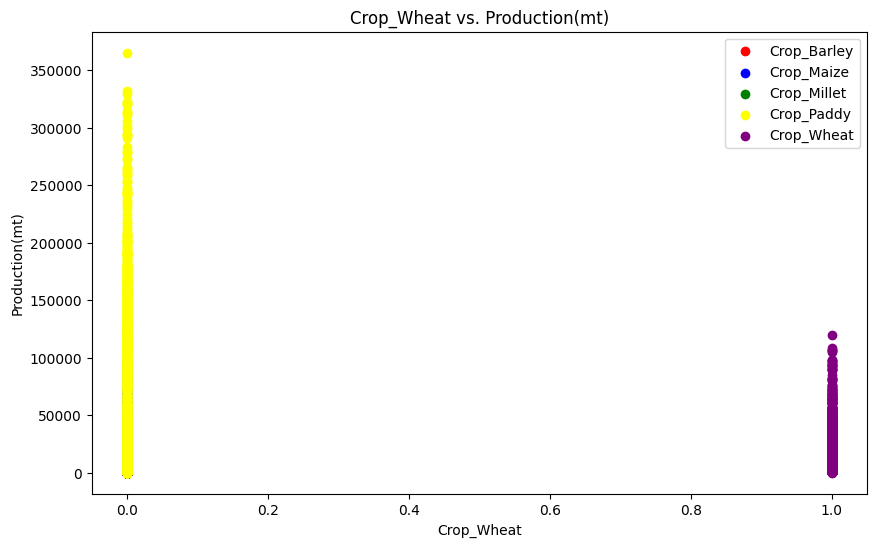

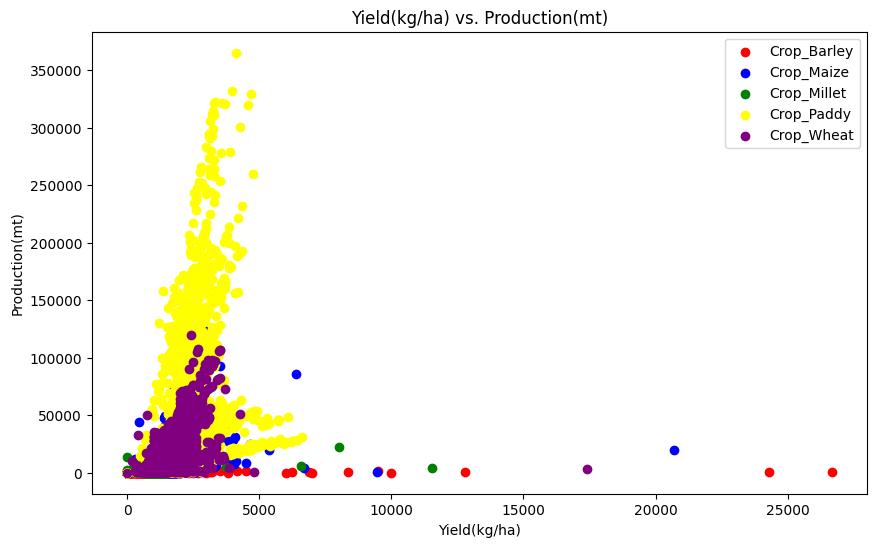

In [30]:
crops = ["Crop_Barley", "Crop_Maize", "Crop_Millet", "Crop_Paddy", "Crop_Wheat"]
colors = ["red", "blue", "green", "yellow", "purple"]

# Iterate over each feature and create scatter plots
features = dft.columns.tolist()
features.remove("Production(mt)")  # Remove the target column from features

for feature in features:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
    
    # Iterate over each crop and plot the scatter points
    for crop, color in zip(crops, colors):
        crop_data = dft[dft[crop] == 1]  # Filter data for the current crop
        plt.scatter(crop_data[feature], crop_data["Production(mt)"], color=color, label=crop)
    
    # Set the labels and title
    plt.xlabel(feature)
    plt.ylabel("Production(mt)")
    plt.title(f"{feature} vs. Production(mt)")
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()